$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 2** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Classification**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Divya** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 23/4** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Sebastian Bergström, 950215-0411, sebbergs@student.chalmers.se** <br />
$\qquad$ $\qquad$$\qquad$ $\qquad$$\qquad$$\qquad$ ** Jan Liu, 920119-2516, lijan@student.chalmers.se**

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

# Theoretical problems

## [Naive Bayes Classifier, 6 points]

A psychologist does a small survey on ''happiness''. Each respondent provides a vector with entries 1 or 0 corresponding to if they answered “yes” or “no” to a question respectively. The question vector has attributes 
$$
x = (\mbox{rich, married, healthy}) \tag{1}
$$

Thus a response $(1, 0, 1)$ would indicate that the respondent was
''rich'', ''unmarried'' and ''healthy''. In addition, each respondent
gives a value $c = 1$ if they are content wih their life and $c = 0$
if they’re not. The following responses were obtained.

$$
c = 1: (1, 1, 1),(0, 0, 1),(1, 1, 0),(1, 0, 1) \\
c = 0: (0, 0, 0),(1, 0, 0),(0, 0, 1),(0, 1, 0)
$$

1. Using naive Bayes, what is the probability that a person is ''not rich'', ''married'' and ''healthy'' is ''content''?

2. What is the probability that a person who is ''not rich'' and ''married'' is content ? (i.e. we do not know if they are ''healthy'')

## [Extending Naive Bayes, 4 points]

Consider now, the following vector of attributes:

* $x_1 = 1$ if customer is younger than 20 and 0 otherwise.
* $x_2 = 1$ if customer is between 20 and 30 in age, and 0 otherwise.
* $x_3 = 1$ if customer is older than 30 and 0 otherwise
* $x_4 = 1$ if customer walks to work and 0 otherwise.

Each vector of attributes has a label ''rich'' or ''poor''. Point out potential difficulties with your approach above to training using naive Bayes. Suggest and describe how to extend your naive Bayes method to this dataset.


# Practical problems

## [Bayes classifier, 5 points]

Dowload the dataset **"dataset2.txt"**. You can use the following code for example:
```python
from numpy import genfromtxt
data = genfromtxt('dataset2.txt', delimiter=',')
labels = data[:,-1]
```
The dataset contains $3$-dimensional data, $X$, generated from $2$ classes with labels, $y$ either $+1$ or $-1$.  Each row of $X$ and $y$ contain one observation and one label respectively.  There are $1000$ instances of each class. 

a. Assume that the class conditional density is spherical Gaussian, and both classes have equal prior. Write the expression for the Bayes (<span style="color:red"> not **naive Bayes**</span>) classifier i.e. derive
$$
P(y_{new} = -1 | x_{new} , X, y ) \\
P(y_{new} = +1 | x_{new} , X, y ) ~.
$$

It is useful to note that the dependence on training data $X, y$ for class $1$ can be expressed as: 

$$ 
P( x_{new} | y_{new} = 1, X, y) = P(x_{new} |
\hat{\mu}_{1}, \hat{\sigma}^{2}_{1})
$$

where $\hat{\mu}_{1} \in \mathbb{R}^3$ and $\hat{\sigma}^{2}_{1}\in \mathbb{R}$ are MLE estimates for mean (3-dimensional) and variance based on training data with label $+1$ (and similarly for class 2 with label $-1$). 

b. Implement a function **sph_bayes()** which computes the probability of a new test point *Xtest* coming from class $1$ ($P1$) and class $2$ ($P2$). Finally, assign a label *Ytest* to the test point based on the probabilities $P1$ and $P2$.

```python
def sph_bayes(Xtest, ...): # other parameters needed.

    return [P1, P2, Ytest]
```
c. Write a function **new_classifier()**

```python
def new_classifier(Xtest, mu1, mu2)
    
    return [Ytest]
```
which implements the following classifier,
$$
f(x) = \mbox{sign}\left(\frac{(\mu_1 - \mu_2)^\top (x - b) }{\|\mu_1 -  \mu_2\|_2} \right)
$$
with $b = \frac{1}{2}(\mu_1 + \mu_2)$.

d. Report 5-fold cross validation error for both classifiers.

## [DIGITS dataset classifer, 5 points]

Load the DIGITS dataset:
```python
from sklearn import datasets
digits = datasets.load_digits()
```
This dataset contains $1797$ samples of ten handwritten digit classes. You can further query and visualize the dataset using the various attributes of the returned dictionary:
```python
data = digits.data
print(data.shape)
target_names = digits.target_names
print (target_names)
import matplotlib.pyplot as plt
y = digits.target
plt.matshow(digits.images[0])
plt.show()
```

a. Use **new_classifier()** designed previously to do binary classification between classes representing digits "*5*" and "*8*".

b. Investigate an alternative feature function as described below:

1. Scale each pixel value to range $[0, 1] $ from original gray-scale ($0-255$). 
2. Compute variance of each row and column of the image. This will give you a new feature vector of size $16$ i.e. 

$$ 
x' = \left[ \; Var(row_1)  , Var(row_2), \ldots , Var(row_{8}), Var(col_1), \ldots, Var(col_{8}) \;\right]^T
$$

c. Report $5$-fold cross validation results for parts $(a)$ and
$(b)$ in a single table. What can you say about the results?

We want to derive

$$
P(y_{new} = -1 | x_{new} , X, y ), \\
P(y_{new} = +1 | x_{new} , X, y ).
$$

Using 


$$ 
P( x_{new} | y_{new} = 1, X, y) = P(x_{new} |
\hat{\mu}_{1}, \hat{\sigma}^{2}_{1})
$$


and Bayes' theorem we have

$$
P(y_{new} = c | x_{new}, X, y) =  \frac{P(y_{new} = c) P( x_{new} | y_{new} = 1, X, y)}{P(y_{new} = 1) P( x_{new} | y_{new} = 1, X, y) + P(y_{new} = -1|) P( x_{new} | y_{new} = 1, X, y)},
$$
$$
 = \frac{P(y_{new} = c) P(x_{new} |
\hat{\mu}_{c}, \hat{\sigma}^{2}_{c})}{P(y_{new} = 1) P(x_{new} |
\hat{\mu}_{1}, \hat{\sigma}^{2}_{1}) + P(y_{new} = -1) P(x_{new} |
\hat{\mu}_{-1}, \hat{\sigma}^{2}_{-1})},
$$

since they have equal priors we can cancel that and end up with

$$
 = \frac{P(x_{new} |
\hat{\mu}_{c}, \hat{\sigma}^{2}_{c})}{P(x_{new} |
\hat{\mu}_{1}, \hat{\sigma}^{2}_{1}) +P(x_{new} |
\hat{\mu}_{-1}, \hat{\sigma}^{2}_{-1})},
$$

where $P(x_{new} |
\hat{\mu}_{c}, \hat{\sigma}^{2}_{c})$ is the PDF of a spherical Gaussian with mean $\hat{\mu}_{c}$ and covariance matrix $\hat{\sigma^2}_c I$ i.e.

$$ P(x_{new} \,|\,
\hat{\mu}_{c}, \hat{\sigma}^{2}_{c}) =  \frac{1}{ 2\pi \hat{\sigma}^{2}_{c}}   \exp
\left( -\frac{ (x_{new} - \hat{\mu}_{c})^{\top}(x_{new} - \hat{\mu}_{c}) }{2\hat{\sigma}^{2}_{c}} \right)
~.$$

Spherical Bayes classifier failed to classify the validation set 0.000% of the times
New classifier failed to classify the validation set 0.000% of the times


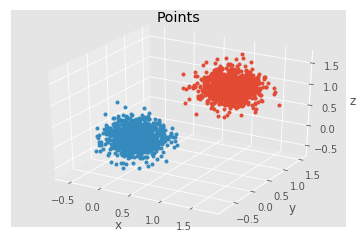

In [3]:
import matplotlib
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import genfromtxt
import numpy as np
from scipy.stats import multivariate_normal

def sph_pdf(x, mu, sigmaSquared):
    k = len(mu)
    return np.exp(-1/(2*sigmaSquared)*np.dot(x-mu, x-mu))/np.sqrt((2*np.pi*sigmaSquared)**k)

def sge(X):
    # Precondition
    # X : matrix
    N, p = X.shape
    mu = np.sum(X,axis=0)/N
    sigma = 1/np.sqrt(N*p) * np.sqrt(np.sum( np.linalg.norm(X-mu,axis=1)**2))
    return mu, sigma    

def sph_bayes(Xtest, mus, sigmas):
    # Precondition
    # mus : list of size 2
    # sigmas : list of size 2
    partials = [sph_pdf(Xtest, mu, sigma) for mu, sigma in zip(mus, sigmas)]
    partials = partials/np.sum(partials)
    P1, P2 = partials
    Ytest = 1 if P1 > P2 else -1
    return [P1, P2, Ytest]

def new_classifier(Xtest, mu1, mu2):
    diff = mu1-mu2
    b = 1/2*(mu1 + mu2)
    Ytest = np.sign(np.dot(diff, Xtest-b)/np.linalg.norm(diff))
    return [Ytest]

def new_classifier_wrapper(Xtest, mus, sigmas):
    return new_classifier(Xtest, mus[0], mus[1])

def cross_validation(data, nFolds, classifier):
    # Precondition
    # Data evenly divided by nFolds
    N, p = data.shape
    validation_size = int(N/nFolds)
    validation_indices = np.zeros(N, dtype=bool)
    validation_indices[:validation_size] = 1

    total_error = 0
    for it in range(nFolds):
        if it == nFolds-1 and N%nFolds != 0:
            validation_indices[:-N%nFolds] = 0
            validation_size = N%nFolds
        training_data = data[~validation_indices, :]
        validation_data = data[validation_indices, :]
        labels = training_data[:, -1]
        mu1, sigma1 = sge(training_data[labels == 1, :-1])
        mu2, sigma2 = sge(training_data[labels == -1, :-1])
        mus = [mu1, mu2]
        sigmas = [sigma1, sigma2]
        error = 0
        for i in range(validation_size):
            result = classifier(validation_data[i, :-1], mus, sigmas)
            error += abs(result[-1] - validation_data[i, -1])/2
        error /= validation_size
        validation_indices = np.roll(validation_indices, validation_size)
        total_error += error
    total_error /= nFolds
    return total_error


data = genfromtxt('dataset2.txt', delimiter=',')
labels = data[:, -1]
#matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
data1 = data[labels == 1, :]
data2 = data[labels == -1, :]
ax.plot(data1[:, 0], data1[:, 1], data1[:, 2], '.', label='Classification 1')
ax.plot(data2[:, 0], data2[:, 1], data2[:, 2], '.', label='Classification 2')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Points')
print('Spherical Bayes classifier failed to classify the validation set {:.3f}% of the times'.format(cross_validation(data, 5, sph_bayes)))
print('New classifier failed to classify the validation set {:.3f}% of the times'.format(cross_validation(data, 5, new_classifier_wrapper)))
plt.show()

In [8]:
from sklearn import datasets

digits = datasets.load_digits()

def extractDigit (d,c):
    data = digits.data
    digits_d = data[digits.target == d]
    n,_ = digits_d.shape
    classification = np.zeros((n,1))+c
    return np.hstack((digits_d,classification))

digits_58 = np.concatenate((extractDigit(5,1),extractDigit(8,-1)),axis=0)
np.random.shuffle(digits_58)
print('Using all pixel data, the classfier failed to distinguish a five from an eight {:.3f}% of the times'.format(100*cross_validation(digits_58,5,new_classifier_wrapper)))

rescaled_digits = digits_58[:,:-1]/16
length = rescaled_digits.shape[0]
digits_var = np.zeros((length,16))

for i in range(length):
    mat = np.reshape(rescaled_digits[i,:],(8,8))
    var_rows = mat.var(axis=1)
    var_cols = mat.var(axis=0)
    digits_var[i,:] = np.concatenate((var_rows.T,var_cols))

digits_var_58 = np.hstack((digits_var,digits_58[:,-1].reshape(length,1)))
np.random.shuffle(digits_var_58)
print('Using variance of rows and columns, the classfier failed to distinguish a five from an eight {:.3f}% of the times'.format(100*cross_validation(digits_var_58,5,new_classifier_wrapper)))

Using all pixel data, the classfier failed to distinguish a five from an eight 1.127% of the times
Using variance of rows and columns, the classfier failed to distinguish a five from an eight 10.986% of the times


## Discussion

The classifier performs significantly worse when using the variance of the rows and columns as features instead of the pixel data. This come as no surprise, since we lose a lot of information about the picture when only using the variance. It does however still perform decent, and may be an interesting alternative if using images with many pixels, as the number of rows and columns grows as $2n$ while the number of pixels grow as $n^2$.

Furthermore, the variance based testing may be better in certain datasets. For example, the raw pixel feature will most likely have a hard time classifying digits if they are written in different places in the square. The variance feature might be better to classify, for example, the digit one no matter if it is written to the left or the right of the square.